#Taxa de aprendizado

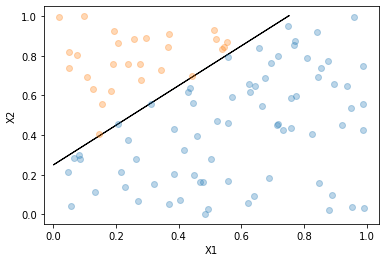

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def geradataset(tamanho=20):
    X = np.random.uniform(size=(tamanho,2))
    y = np.array(X[:,0]>X[:,1]-0.25, dtype=int)*2-1
    return X, y

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def perpendicular(vetor):
    rotaciona = np.array([[0,1],[-1,0]])
    perp = np.matmul(np.array(vetor),rotaciona)
    return perp

def plotahiperplano(vetor, bias=0):
    hiperplano = perpendicular(vetor)
    plt.arrow(*[0,bias], *(hiperplano-bias))

X, y = geradataset(100)
plotadataset(X, y)
plotahiperplano([1,-1],0.25)
plt.show()


In [ ]:
class Adaline():
    def __init__(self):
        self.preactivated = True
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum((1 - Adaline.erro(y, ypred))**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(Adaline.erro(y, ypred), X)

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, custo=Adaline(), alpha=0.014):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = alpha
        self.maxiter = 20
        self.custo = custo
        self.whist = []
        self.chist = []
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.maxiter):
            if hasattr(self.custo, 'preactivated') and self.custo.preactivated:
                ypred = self.preactivate(X)
            else: 
                ypred = self.predict(X) 
            custo = self.custo.custo(y, ypred)
            print(custo)
            self.whist.append(self.w)
            self.chist.append(custo)
            if custo==0:
                break
            self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, Xb)
        print(self.w)
    
    def preactivate(self, X):
        Xb = Perceptron.includebias(X)
        return np.matmul(Xb, self.w)

    def predict(self, X):
        a = self.preactivate(X)
        ypred = self.activation(a)
        return ypred

70.29835048067073
223.94837242683974
113.34668425638357
165.2980637985672
131.24777277362864
147.18176009179987
135.9842401710776
140.4477073837354
136.47869218441454
137.48432292409862
135.91412025289063
135.95757737914505
135.2418116536189
135.07114262925197
134.69606029517098
134.51951661726423
134.30219903760235
134.16640807277926
134.033949459454
133.94038708037465
[ 0.45947114  1.48829941 -1.42772941]
0.95


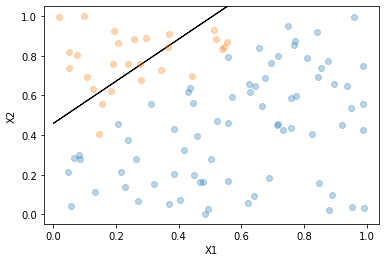

In [ ]:
perceptron = Perceptron(alpha=0.01)
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

plotadataset(X, y)
plotahiperplano(perceptron.w[1:],perceptron.w[0])
plt.show()